# Vamos a hacer una red simple para entrener con mnist

- Implementar una red convolucional simple en Keras para entrenar con MNIST
- Entrenar la red
- Usar la red para predecir en ejemplos nuevos

## Modelo simple en Keras/Tensorflow

Armemos una red muy simple para clasificar digitos.

In [2]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

num_filters = 8
filter_size = 3
pool_size = 2

# Armar el modelo
model = Sequential()
model.add(Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))  

# otra manera de hacer lo mismo:
#model = Sequential([
#  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
#  MaxPooling2D(pool_size=pool_size),
#  Flatten(),
#  Dense(10, activation='softmax'),
#])

# Compilar el modelo
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

## Cargamos los datos


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


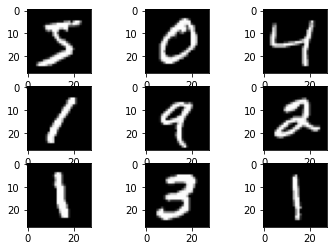

In [5]:
# Cargar el dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# Imprimir un resumen de los datos
print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))
# Plotear las primeras imágenes
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

# Normalizamos las imágenes
train_X_n = (train_X / 255) - 0.5
test_X_n = (test_X / 255) - 0.5

# Hacemos reshape de las imágenes para que tengan un canal
train_X_n = train_X_n.reshape((train_X_n.shape[0], 28, 28, 1))
test_X_n = test_X_n.reshape((test_X_n.shape[0], 28, 28, 1))

# también se puede hacer
#train_X_n = np.expand_dims(train_X_n, axis=3)
#test_X_n = np.expand_dims(test_X_n, axis=3)



In [18]:
train_X_n.shape

(60000, 28, 28, 1)

In [19]:
train_X.shape

(60000, 28, 28)

### Entrenamos el modelo

Epoch 1/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3648 - accuracy: 0.8942 - val_loss: 0.2137 - val_accuracy: 0.9407
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1761 - accuracy: 0.9494 - val_loss: 0.1375 - val_accuracy: 0.9596
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1293 - accuracy: 0.9626 - val_loss: 0.1132 - val_accuracy: 0.9654
[7 2 1 0 4]
[7 2 1 0 4]


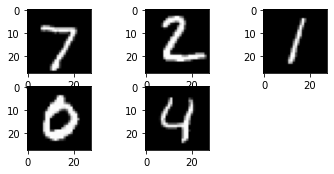

In [7]:
# Entrenamos el modelo
model.fit(
  train_X_n,
  to_categorical(train_y),
  epochs=3,
  validation_data=(test_X_n, to_categorical(test_y)),
)

# Guardar el modelo al disco
#model.save_weights('cnn.h5')

# Cargar el modelo del disco
# model.load_weights('cnn.h5')

# Predecir las primeras 5 imágines del test set
predicciones = model.predict(test_X_n[:5])

# Imprimir las predicciones
print(np.argmax(predicciones, axis=1)) # [7, 2, 1, 0, 4]

# Chequear que son correctas
print(test_y[:5]) # [7, 2, 1, 0, 4]

# Plotear esas imágenes
for i in range(5):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(test_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [8]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________
None


Salida de la convolucion : 26

Tamano de la salida de pol. poolsize: 2 -> 26/2 = 13

flatten = 13x13x8 = 1352

### Ejercicio: hacer otra red que tenga:
1. Capa convolucional, 8 filtros de 3x3
2. Capa max pool
3. Capa convolucional, 16 filtros de 3x3
4. Capa max pool
5. Capa convolucional, 32 filtros de 3x3
6. Capa max pool
7. Flatten
8. Capa densa 
9. Salida

In [9]:
model_2 =  Sequential()
model_2.add(Conv2D(8,kernel_size=(3,3),input_shape = (28,28,1)))
# output_dim =  26x26x8
model_2.add(MaxPooling2D(pool_size=(2,2)))
# output_dim = 13x13x8
model_2.add(Conv2D(16,kernel_size=(3,3)))
# output_dim = 11x11x16
model_2.add(MaxPooling2D(pool_size=(2,2)))
# output_dim = 5x5x16
model_2.add(Conv2D(32,kernel_size=(3,3)))
# output_dim = 3x3x32
model_2.add(MaxPooling2D(pool_size=(2,2)))
#output_dim = 1x1x32
model_2.add(Flatten())
# output_dim = 32
model_2.add(Dense(10,activation='softmax'))

In [13]:
model_2.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [14]:
model_2.fit(
  train_X_n,
  to_categorical(train_y),
  epochs=3,
  validation_data=(test_X_n, to_categorical(test_y)),
)

Epoch 1/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3082 - accuracy: 0.9059 - val_loss: 0.1292 - val_accuracy: 0.9615
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1213 - accuracy: 0.9639 - val_loss: 0.0892 - val_accuracy: 0.9722
Epoch 3/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0936 - accuracy: 0.9721 - val_loss: 0.0843 - val_accuracy: 0.9754


In [15]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 32)          4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)               

[1 4 9 6 9]
[1 4 9 5 9]


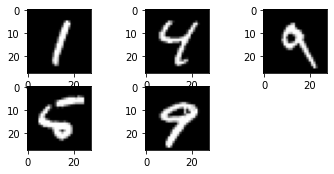

In [17]:
# Predecir las imágines del 5 al 10 del test set
predicciones = model.predict(test_X_n[5:10])

# Imprimir las predicciones
print(np.argmax(predicciones, axis=1)) # [1, 4, 9, 5, 9]

# Chequear que son correctas
print(test_y[5:10]) # [1, 4, 9, 5, 9]

# Plotear esas imágenes
for i in range(5):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(test_X[5+i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

El los valores evaluados el modelo interpreto la imagen de 5 como 6, pero aun asi el rendimiento del modelo es muy bueno (val_accuracy:0.97)

Para interpretar lo que ocurre dentro de las capas convolucionales creamos el mismo modelo truncado en la posicion donde queremos analizar el comportamiento. 

In [51]:
def create_truncated_model(trained_model):
   model = Sequential()
   model.add(Conv2D(8,kernel_size=(3,3),input_shape = (28,28,1))) 
   #model_2.add(MaxPooling2D(pool_size=(2,2)))
   for i, layer in enumerate(model.layers):
      layer.set_weights(trained_model.layers[i].get_weights())
 
   model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
   return model


In [52]:
truncated_model = create_truncated_model(model_2)
hidden_features = truncated_model.predict(test_X_n[5:10])

In [24]:
# verificamos el tamano de salida de la capa convolucional (5 imagenes de entrada,  8 filtros)
hidden_features.shape

(5, 26, 26, 8)

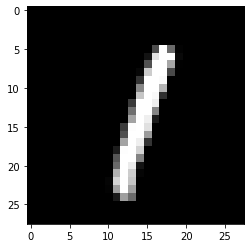

In [30]:
pyplot.imshow(test_X[5], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [44]:
# analizamos la primer imagen, filtro 1
#hidden_features[0,:,:,1]

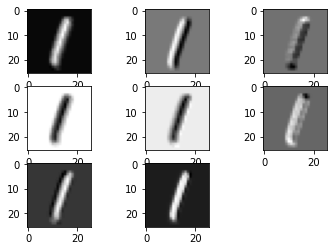

In [45]:
# Analizamos cada una de las capas de salida de cada del filtro convolucional
for i in range(8):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(hidden_features[0,:,:,i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [53]:
# Si le agregamos la capa de pooling
def create_truncated_model2(trained_model):
   model = Sequential()
   model.add(Conv2D(8,kernel_size=(3,3),input_shape = (28,28,1))) 
   model.add(MaxPooling2D(pool_size=(2,2)))
   for i, layer in enumerate(model.layers):
      layer.set_weights(trained_model.layers[i].get_weights())
 
   model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
   return model

In [54]:
truncated_model2 = create_truncated_model2(model_2)
hidden_features2 = truncated_model2.predict(test_X_n[5:10])

In [56]:
hidden_features2.shape

(5, 13, 13, 8)

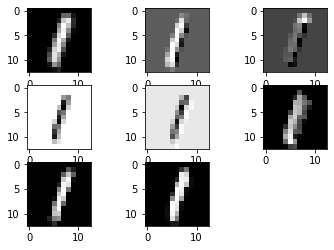

In [55]:
for i in range(8):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(hidden_features2[0,:,:,i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [57]:
# Agregamos una capa convolucional mas 
def create_truncated_model3(trained_model):
   model = Sequential()
   model.add(Conv2D(8,kernel_size=(3,3),input_shape = (28,28,1))) 
   model.add(MaxPooling2D(pool_size=(2,2)))
   model.add(Conv2D(16,kernel_size=(3,3)))
   
   for i, layer in enumerate(model.layers):
      layer.set_weights(trained_model.layers[i].get_weights())
 
   model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
   return model

In [61]:
truncated_model3 = create_truncated_model3(model_2)
hidden_features3 = truncated_model3.predict(test_X_n[5:10])

In [63]:
hidden_features3.shape

(5, 11, 11, 16)

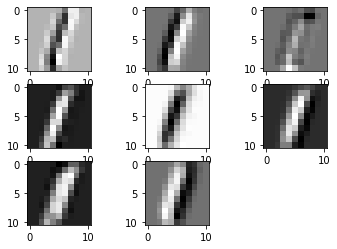

In [62]:
# La salida de la segunda capa convolucional
for i in range(8):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(hidden_features3[0,:,:,i], cmap=pyplot.get_cmap('gray'))
pyplot.show()